In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Đọc file csv và gắng index với giá Close
df = pd.read_csv('D:/PTDLKD/ProjectData/dataset/HBAN.csv')
df1 = df.reset_index()['Close']
df1.describe()

count    3375.000000
mean       10.746607
std         3.446404
min         3.680000
25%         7.490000
50%        10.560000
75%        13.855000
max        17.629999
Name: Close, dtype: float64

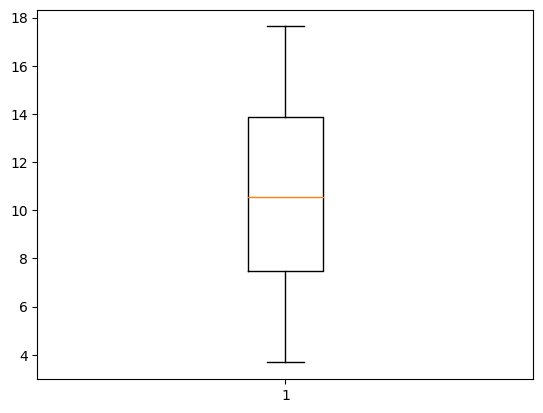

In [3]:
# Tạo plot
plt.boxplot(df1)
plt.show()

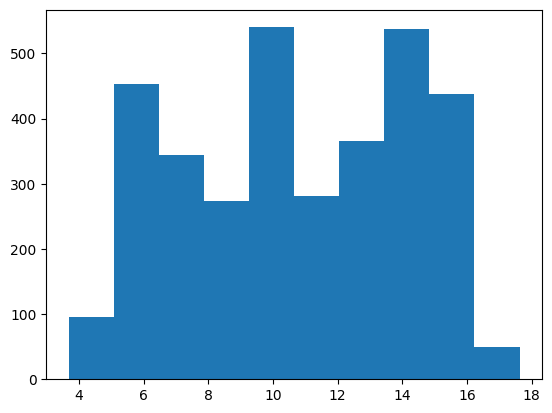

In [4]:
# Tạo Histogram
plt.hist(df1)
plt.show()

In [5]:
# Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [6]:
# Chia train/test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
# Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 277
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
# Fit mô hình GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [10]:
# Dự báo dữ liệu
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))
y_test = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val = scaler.inverse_transform(yval.reshape(-1, 1))

In [12]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )
yval = scaler.inverse_transform(yval.reshape(-1,1) )

In [13]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred_val - yval) / yval)) * 100
test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 0.4429470244285234
Testing RMSE: 0.5903365800748924
Validation MAE: 0.29576588136545773
Testing MAE: 0.4354218776472305
Validation MAPE: 2.69662670558558
Testing MAPE: 2.666826865171026


In [14]:
# Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=277
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
    
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.73261654 0.70896062 0.7039427  0.70967747 0.6788531  0.6867384
 0.70322586 0.73261654 0.71182801 0.69319001 0.67956994 0.67526887
 0.6523298  0.65949826 0.67168464 0.66164879 0.70179217 0.68172048
 0.67598571 0.6695341  0.70465955 0.69820794 0.71397855 0.72616493
 0.73476708 0.73118285 0.71039432 0.72544808 0.71039432 0.71827962
 0.72186385 0.70537639 0.67383517 0.62867388 0.61505381 0.61362012
 0.63512549 0.58494628 0.59211474 0.60501796 0.60860219 0.59211474
 0.63297496 0.62293911 0.6164875  0.61362012 0.59856635 0.60358427
 0.60573481 0.60573481 0.62365596 0.61577065 0.61720435 0.62078857
 0.60573481 0.58853051 0.63297496 0.63799288 0.67096779 0.66523302
 0.69247317 0.6695341  0.68745525 0.65949826 0.67455202 0.67096779
 0.68888894 0.69319001 0.68315417 0.6960574  0.69103948 0.70035847
 0.70107532 0.70967747 0.73691762 0.75340507 0.76487461 0.76559145
 0.77347676 0.76344091 0.76344091 0.74551977 0.71899647 0.71971331
 0.72114701 0.74050185 0.71397855 0.70179217 0.6960

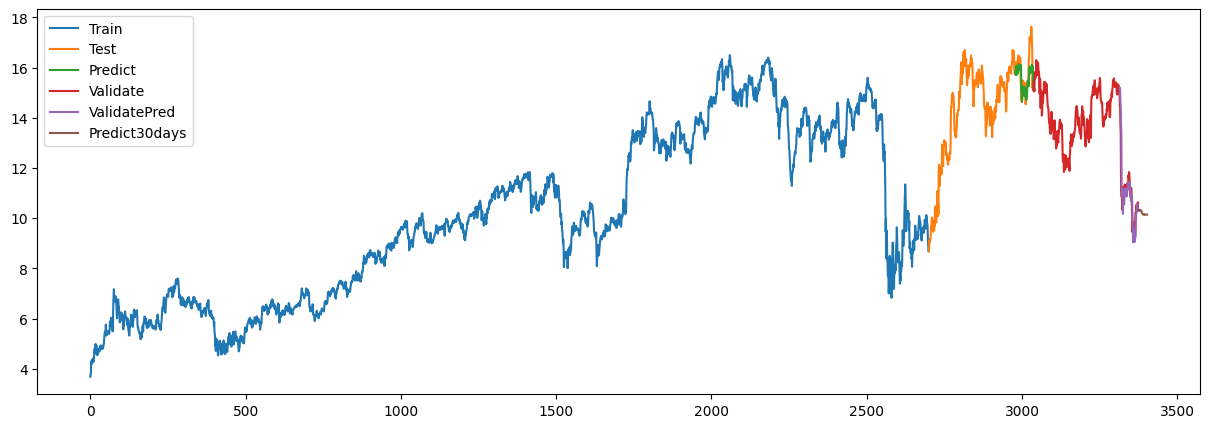

In [15]:
# Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.subplots(figsize=(15, 5))
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+278, stop=train_size+test_size, step=1)
plt.plot(test_data_index[:len(y_pred)], y_pred)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+278, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index[:len(y_pred_val)-1], y_pred_val[:-1])
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index[:len(y_pred)], scaler.inverse_transform(np.reshape(lst_output, (-1, 1))))
plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred', 'Predict30days'])
plt.show()

In [16]:
lst_output_2d = np.array(lst_output).reshape(-1, 1)
scaler.inverse_transform(lst_output_2d)

array([[10.31806133],
       [10.31806133],
       [10.31008327],
       [10.34178135],
       [10.31008327],
       [10.30572428],
       [10.31806133],
       [10.31806133],
       [10.30392034],
       [10.30392034],
       [10.30392034],
       [10.29074081],
       [10.21869544],
       [10.18825875],
       [10.17786982],
       [10.15418604],
       [10.15418604],
       [10.14188874],
       [10.14188874],
       [10.14446911],
       [10.14446911],
       [10.15970341],
       [10.14446911],
       [10.14446911],
       [10.14446911],
       [10.14446911],
       [10.14446911],
       [10.14446911],
       [10.14446911],
       [10.14446911]])